## Estadística Aplicada

Sesión 7 - 7 septiembre

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [1]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#librerias especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [4]:
#datos
recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [11]:
#estimar el modelo exponencial
expon = ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [12]:
##a) riesgo
expon.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [13]:
##supervivencia t= 16
expon.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

In [14]:
## acceder funcion supervivencia
expon.survival_function_

,Exponential_estimate
5.0,0.846482
8.0,0.765928
11.0,0.693041
14.0,0.627089
17.0,0.567414
20.0,0.513417
23.0,0.464559
26.0,0.420350
29.0,0.380349
32.0,0.344154


Text(0, 0.5, '$S(t)$')

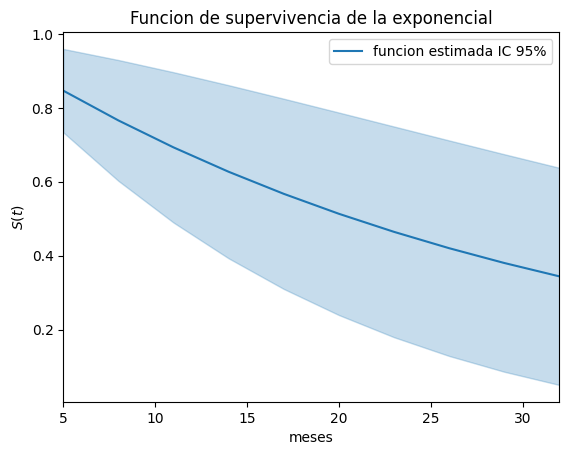

In [32]:
#graficas s(t)
expon.plot_survival_function(label = 'funcion estimada IC 95%')
plt.title('Funcion de supervivencia de la exponencial')
plt.xlim(5, 32)
plt.xlabel('meses')
plt.ylabel('$S(t)$')

Text(0, 0.5, '$h(t)$')

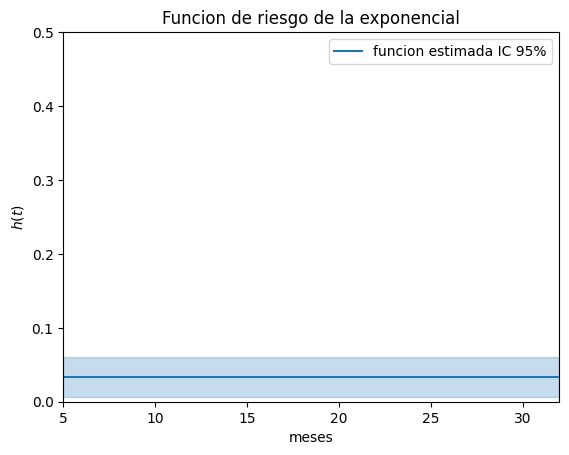

In [33]:
#grafica h(t)
expon.plot_hazard(label = 'funcion estimada IC 95%')
plt.title('Funcion de riesgo de la exponencial')
plt.xlim(5, 32)
plt.ylim(0,0.5)
plt.xlabel('meses')
plt.ylabel('$h(t)$')

Text(0, 0.5, '$f(t)$')

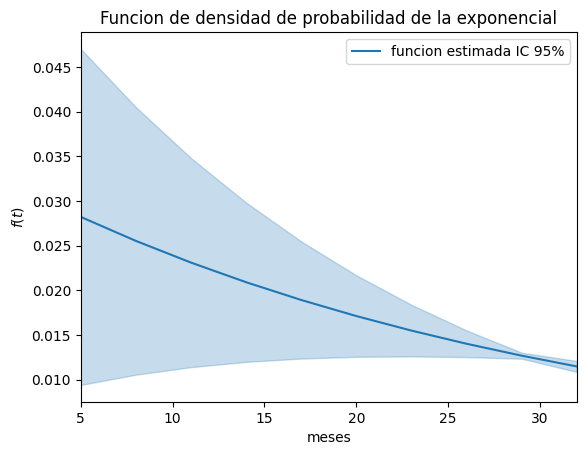

In [34]:
#grafica f(t)
expon.plot_density(label = 'funcion estimada IC 95%')
plt.title('Funcion de densidad de probabilidad de la exponencial')
plt.xlim(5, 32)
plt.xlabel('meses')
plt.ylabel('$f(t)$')

## Weibull

Vamos a suponer que el tiempo de recaida se distribuye Weibull

In [35]:
#modelo weibull
mweibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [36]:
##valor de gamma

In [37]:
mweibull.rho_.round(2)

1.89

Text(0, 0.5, '$ h(t) $')

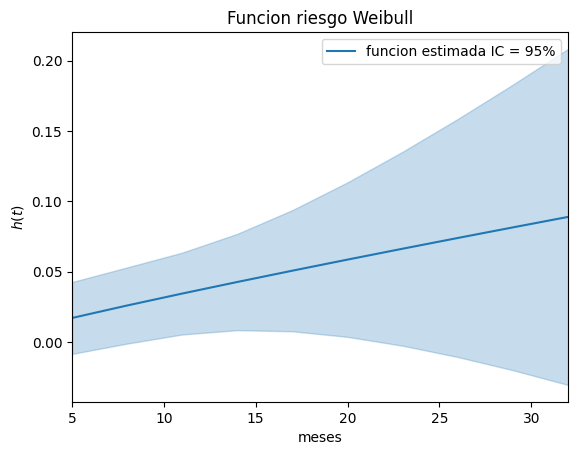

In [39]:
mweibull.plot_hazard(label = 'funcion estimada IC = 95%')
plt.title('Funcion riesgo Weibull')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$ h(t) $')

Text(0, 0.5, '$ S(t) $')

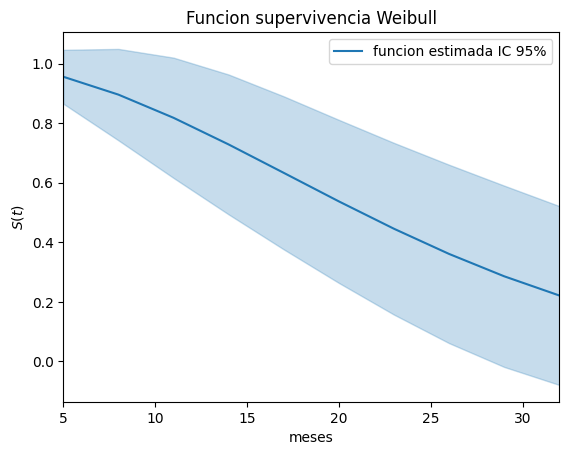

In [40]:
##
mweibull.plot_survival_function(label = 'funcion estimada IC 95%')
plt.title('Funcion supervivencia Weibull')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$ S(t) $')


Text(0, 0.5, '$ f(t) $')

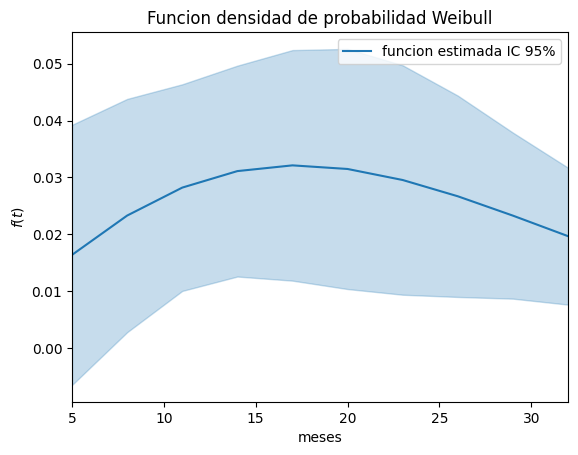

In [42]:
mweibull.plot_density(label = 'funcion estimada IC 95%')
plt.title('Funcion densidad de probabilidad Weibull')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$ f(t) $')

### Log Normal

Vamos a suponer que el tiempo de recaida se distrbuye lognormal

In [43]:
mlogn = LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

Text(0, 0.5, '$ h(t) $')

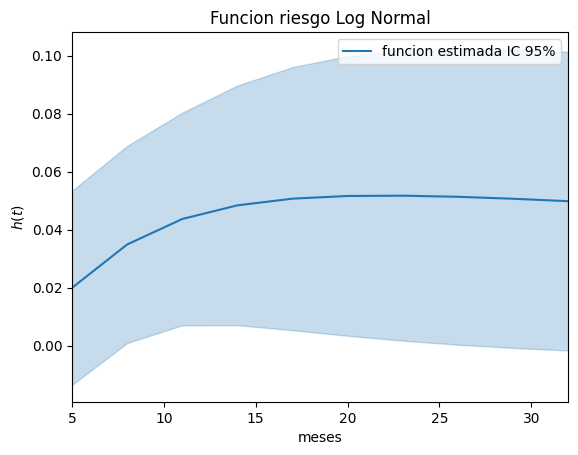

In [45]:
##grafica funcion de riesgo
mlogn.plot_hazard(label = 'funcion estimada IC 95%')
plt.title('Funcion riesgo Log Normal')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$ h(t) $')

Text(0, 0.5, '$ S(t) $')

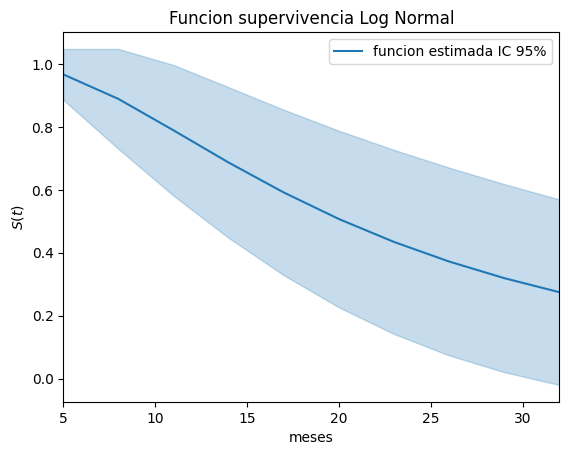

In [46]:
mlogn.plot_survival_function(label = 'funcion estimada IC 95%')
plt.title('Funcion supervivencia Log Normal')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$ S(t) $')


Text(0, 0.5, '$ f(t) $')

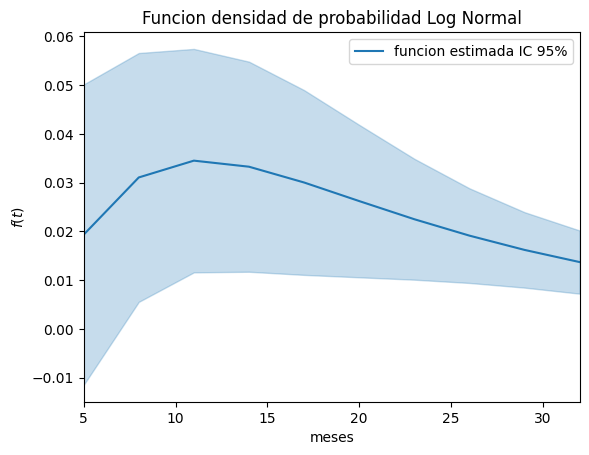

In [48]:
mlogn.plot_density(label = 'funcion estimada IC 95%')
plt.title('Funcion densidad de probabilidad Log Normal')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$ f(t) $')

Cuál de los tres modelos se ajusta mejor (describe) a los datos:

1. Exponencial
2. Weibull
3. LogNormal

criterio Akaike(AIC) = $-2ln(fn Verosimilitud) + 2k $

k = parametros del modelo

De acuerdo con el AIC el "mejor" modelo es el que tiene el menor valor de AIC.  De acuerdo con el criterio de Akaike son "mejores" modelos mas simples

In [52]:
print(f'Exponencial: {expon.AIC_.round(2)}, Weibull: {mweibull.AIC_.round(2)}, LogNormal: {mlogn.AIC_.round(2)}')

Exponencial: 54.81, Weibull: 54.16, LogNormal: 54.51


De acuerdo con AIC el mejor modelo es el Weibull, lo que significa que el riesgo de recaída es creciente.